In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

/home/boris/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/boris/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/boris/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
declarations_df = pd.read_csv('data/declarations.csv')
declarations_df.head()


,person_id,person_name,year,office_id,office_name,income,savings,real_estate_amount,real_estate_squares
0,8,Зюганов Геннадий Андреевич,1998,14,Государственная Дума,124154.00,0.00,1,150.0
1,8,Зюганов Геннадий Андреевич,1999,449,Президент Российской Федерации,506247.00,0.00,3,252.7
2,8,Зюганов Геннадий Андреевич,2006,14,Государственная Дума,1257784.00,141740.91,1,167.4
3,8,Зюганов Геннадий Андреевич,2006,449,Президент Российской Федерации,3590668.48,400490.32,2,281.3
4,8,Зюганов Геннадий Андреевич,2009,14,Государственная Дума,2177821.52,0.00,3,448.7


In [4]:
office_names = declarations_df[['office_id', 'office_name']].drop_duplicates().reset_index(drop=True)
office_names.index = office_names.office_id
office_names = office_names.drop(['office_id'], axis=1)
office_names

,office_name
office_id,
14,Государственная Дума
449,Президент Российской Федерации
118,Государственное собрание – Курултай Республик...
267,Законодательное собрание Алтайского края
211,Губернатор Иркутской области
1575,Новосибирск - городской округ
258,Мэр города Москвы
5,Совет Федерации
225,Губернатор Омской области


# Plan
## Meta
* Total declarations
## Basic info 
* Total people
* Total offices
* People distribution by years
* People distribution by office
* People distribution by years by office

## Declared incomes
* Income, savings, real estate distributions
    * By year
* Richest people by year
    * Top 10 richest people in each year
* Median incomes and assets by office
* Zeros in data
* Zeros per office - potential issues with income declaration


# Meta

In [5]:
print(declarations_df.shape)

(200545, 9)


# People distribution, offices

In [6]:
print('Unique persons', declarations_df.person_id.unique().shape[0])
print('Unique offices', declarations_df.office_id.unique().shape[0])

Unique persons 132016
Unique offices 3239


Top 20 offices by unique people


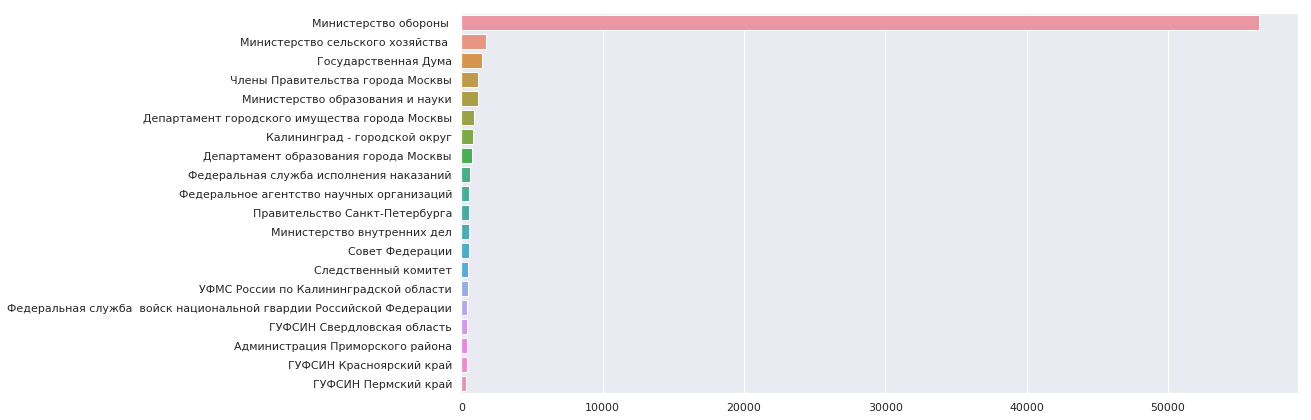

In [7]:
print('Top 20 offices by unique people')
unique_per_office = declarations_df.groupby(['office_id'])['person_id'].nunique().sort_values(ascending=False)

to_plot = unique_per_office.head(20)
plt.figure(figsize=(15, 7))
sns.barplot(y=office_names.loc[to_plot.index].values.flatten(), x=to_plot.values)
plt.show()

Top 20 offices by unique people without military


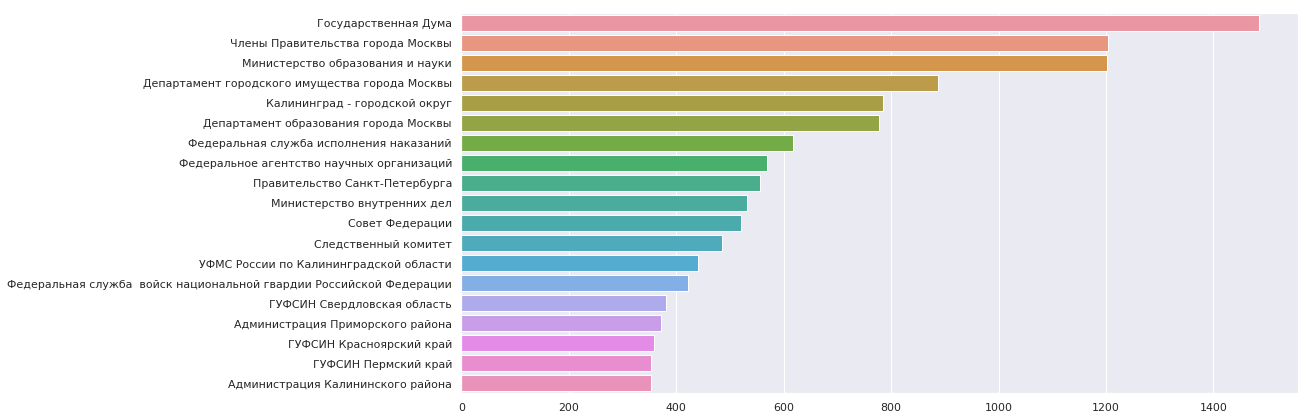

In [8]:
print('Top 20 offices by unique people without military')
to_plot = unique_per_office.head(21).tail(19)

plt.figure(figsize=(15, 7))
sns.barplot(y=office_names.loc[to_plot.index].values.flatten(), x=to_plot.values)
plt.show()

## Military is excluded from all further analysis

In [9]:
MILITARY_OFFICE = 450
declarations_df = declarations_df[declarations_df.office_id != 450]
print(declarations_df.shape)

(144076, 9)


People per year


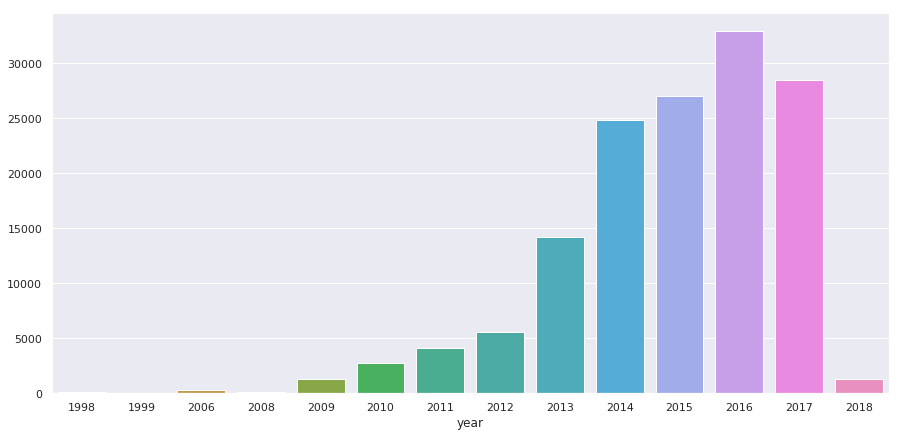

In [10]:
print('People per year')
unique_per_year = declarations_df.groupby(['year'])['person_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(x=unique_per_year.index, y=unique_per_year.values)
plt.show()

Top 5 offices, people distribution by years


<Figure size 1080x504 with 0 Axes>

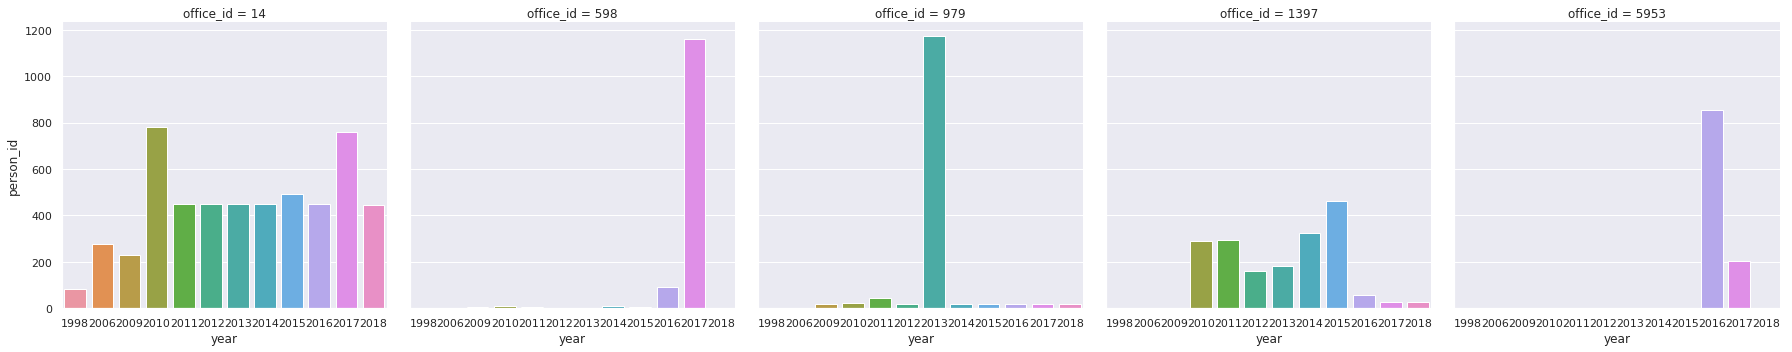

In [41]:
unique_per_office_per_year = declarations_df.groupby(['office_id', 'year'])['person_id'].nunique()

top_offices = unique_per_office.head(21).tail(19).head(5).index
to_plot = unique_per_office_per_year.loc[top_offices].reset_index()

print('Top 5 offices, people distribution by years')
plt.figure(figsize=(15, 7))
sns.catplot(x='year', y='person_id', col='office_id', data=to_plot, kind='bar')
plt.show()